<a href="https://colab.research.google.com/github/katherineeyee/MLProject/blob/main/CS171_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

In [ ]:
import pandas as pd

# import dataset
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
# count scores >= 70
above_70 = (df['exam_score'] >= 70).sum()

# count scores < 70
below_70 = (df['exam_score'] < 70).sum()

print(f"Number of students with exam score >= 70: {above_70}")
print(f"Number of students with exam score < 70: {below_70}")

Number of students with exam score >= 70: 511
Number of students with exam score < 70: 489


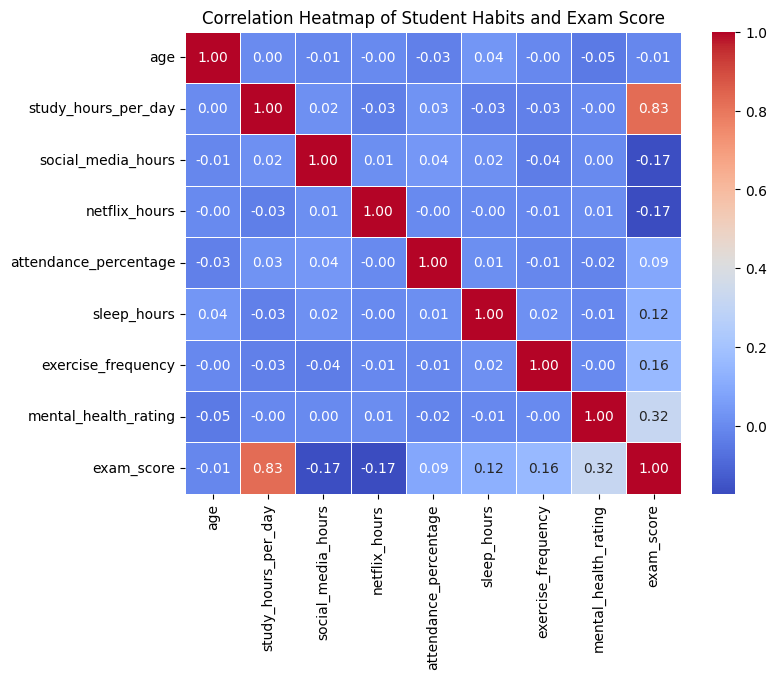

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Student Habits and Exam Score")
plt.show()

In [ ]:
# drop student ID
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'])


# automatically one-hot encode all remaining object-type features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# create binary target
df['binary_target'] = (df['exam_score'] >= 70).astype(int)

# convert to NumPy
unscaled_inputs_all = df.drop(['exam_score', 'binary_target'], axis=1).to_numpy()
targets_all = df['binary_target'].to_numpy()

# scale inputs
from sklearn import preprocessing
scaled_inputs = preprocessing.scale(unscaled_inputs_all)

# Shuffling the data
import numpy as np
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices) # shuffle the indices of the data

shuffled_inputs = scaled_inputs[shuffled_indices] # use the shuffled indices to shuffle the inputs
shuffled_targets = targets_all[shuffled_indices] # use the shuffled indices to shuffle the targets

print(df.columns)
df.head()



Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other',
       'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_Yes',
       'binary_target'],
      dtype='object')


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,binary_target
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,False,False,False,False,False,False,True,False,False,True,0
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,False,False,False,True,False,True,False,False,False,False,1
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,True,False,False,False,True,True,False,False,True,False,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,False,False,False,False,True,False,True,True,False,True,0
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,False,False,False,False,False,False,True,True,False,False,0


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Splitting the data

# split the dataset into train and temp sets
train_inputs, temp_inputs, train_targets, temp_targets = train_test_split(
    shuffled_inputs, shuffled_targets, test_size=0.2, random_state = 42
)

# split the temp set into validation (50% of temp set) and test (50% of temp) sets
validation_inputs, test_inputs, validation_targets, test_targets = train_test_split(
    temp_inputs, temp_targets, test_size=0.5, random_state=42
)

# print statistics
print(np.sum(train_targets), len(train_targets), np.sum(train_targets) / len(train_targets))
print(np.sum(validation_targets), len(validation_targets), np.sum(validation_targets) / len(validation_targets))
print(np.sum(test_targets), len(test_targets), np.sum(test_targets) / len(test_targets))

410 800 0.5125
54 100 0.54
47 100 0.47


In [ ]:
# sequential model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# set the input and output sizes
input_size = train_inputs.shape[1]
output_size = 1
hidden_layer_size = 50 # same size for both hidden layers

model = Sequential([
    Dense(hidden_layer_size, activation='relu', input_shape=(input_size,)),
    Dropout(0.3),
    Dense(hidden_layer_size, activation='relu', input_shape=(input_size,)),
    Dropout(0.3),
    Dense(output_size, activation='sigmoid')  # For binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

batch_size = 50
max_epochs = 100

# early stopping to prevent overfiting with patience 3
early_stopping = EarlyStopping(
    monitor='val_loss',       # What to watch (could be 'val_accuracy' too)
    patience=3,               # Number of epochs with no improvement before stopping
    restore_best_weights=True, # Revert to best weights after stopping
    verbose=1
)

history = model.fit(
    train_inputs, train_targets,
    epochs=max_epochs,
    batch_size=batch_size,
    validation_data=(validation_inputs, validation_targets),
    callbacks=[early_stopping],
    verbose=2
)

# evaluate the model on the test set for final performance metrics
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.2%}')

loss, accuracy = model.evaluate(test_inputs, test_targets)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(test_inputs)
y_pred = (y_pred_probs > 0.5).astype(int)

print("Neural Network Classification Report:")
print(classification_report(test_targets, y_pred))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 2s - 104ms/step - accuracy: 0.5500 - loss: 0.6873 - val_accuracy: 0.6400 - val_loss: 0.6546
Epoch 2/100
16/16 - 0s - 7ms/step - accuracy: 0.6237 - loss: 0.6461 - val_accuracy: 0.6800 - val_loss: 0.6193
Epoch 3/100
16/16 - 0s - 7ms/step - accuracy: 0.6737 - loss: 0.6052 - val_accuracy: 0.7500 - val_loss: 0.5816
Epoch 4/100
16/16 - 0s - 9ms/step - accuracy: 0.7450 - loss: 0.5559 - val_accuracy: 0.7800 - val_loss: 0.5402
Epoch 5/100
16/16 - 0s - 7ms/step - accuracy: 0.7625 - loss: 0.5067 - val_accuracy: 0.8100 - val_loss: 0.4972
Epoch 6/100
16/16 - 0s - 9ms/step - accuracy: 0.7912 - loss: 0.4784 - val_accuracy: 0.8300 - val_loss: 0.4584
Epoch 7/100
16/16 - 0s - 9ms/step - accuracy: 0.8150 - loss: 0.4262 - val_accuracy: 0.8400 - val_loss: 0.4232
Epoch 8/100
16/16 - 0s - 9ms/step - accuracy: 0.8275 - loss: 0.4159 - val_accuracy: 0.8500 - val_loss: 0.3926
Epoch 9/100
16/16 - 0s - 8ms/step - accuracy: 0.8350 - loss: 0.3736 - val_accuracy: 0.8500 - val_loss: 0.3759
Epoch 10/100
16/16 -

In [ ]:
from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the SVC model
svc = SVC(kernel='rbf', C=1.0, gamma="scale", class_weight='balanced')  # Adjust these hyperparameters as needed
svc.fit(train_inputs, train_targets)

# Predict on the test set
svc_preds = svc.predict(test_inputs)

# Evaluate the model
# print("Confusion Matrix:\n", confusion_matrix(test_targets, svc_preds))
# print("\nClassification Report:\n", classification_report(test_targets, svc_preds))
# print("Test Accuracy:", accuracy_score(test_targets, svc_preds))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)  # You can tune this later

# Fit the model to your training data
knn.fit(train_inputs, train_targets)

# Predict on the test set
knn_preds = knn.predict(test_inputs)

# Evaluate the predictions
print("Confusion Matrix:\n", confusion_matrix(test_targets, knn_preds))
print("\nClassification Report:\n", classification_report(test_targets, knn_preds))
print("Test Accuracy:", accuracy_score(test_targets, knn_preds))

val_preds = knn.predict(validation_inputs)
print("Validation Accuracy:", accuracy_score(validation_targets, val_preds))

Confusion Matrix:
 [[35 11]
 [18 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71        46
           1       0.77      0.67      0.71        54

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.72      0.71      0.71       100

Test Accuracy: 0.71
Validation Accuracy: 0.79


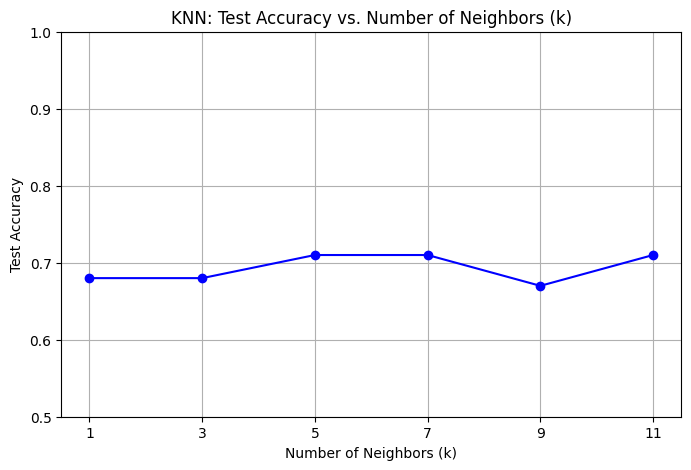

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of k values you want to test
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []

# Train and test KNN models with different k values
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_inputs, train_targets)
    preds = model.predict(test_inputs)
    acc = accuracy_score(test_targets, preds)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN: Test Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.ylim(0.5, 1.0)  # adjust as needed based on your results
plt.show()
